# Conceptos Básicos de Datos Geoespaciales

## ¿Qué son los datos geoespaciales?

Los datos geoespaciales son datos que tienen una componente geográfica o espacial, es decir, están asociados a una ubicación en la Tierra. Estos datos pueden representarse como:

- **Puntos**: Ubicaciones específicas (ciudades, establecimientos, eventos)
- **Líneas**: Rutas, ríos, carreteras
- **Polígonos**: Áreas como países, provincias, parcelas, lagos

## Formatos comunes de datos geoespaciales

- **Shapefile (.shp)**: Formato estándar desarrollado por ESRI.
- **GeoJSON**: Formato basado en JSON para representar datos geoespaciales.
- **CSV con coordenadas**: Archivos de valores separados por comas que incluyen latitud y longitud.
- **GeoTIFF**: Para datos raster (imágenes satelitales, modelos de elevación).

## Sistemas de coordenadas

- **Coordenadas geográficas**: Latitud y longitud en grados.
- **Proyecciones cartográficas**: Transformaciones matemáticas para representar la superficie esférica de la Tierra en un plano.
- **CRS (Sistema de Referencia de Coordenadas)**: Define cómo las coordenadas se relacionan con lugares en la Tierra.

In [161]:
#!pip3 install geopandas folium matplotlib cartopy shapely plotly

GeoPandas extiende las capacidades de Pandas para trabajar con datos geoespaciales. Permite operaciones espaciales y manejo eficiente de geometrías.

In [162]:
import geopandas as gpd
import pandas as pd
import folium
pd.set_option('display.max_columns', None)

In [163]:
world = gpd.read_file('/Users/patriciajaquez/Documents/GitHub/mapas_python/mapas/ne_110m_admin_0_countries_lakes.shp')

In [164]:
world.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  \
0         0      2  Sovereign country   1                         Fiji   
1         0      2  Sovereign country   1  United Republic of Tanzania   
2         0      2      Indeterminate   1               Western Sahara   
3         0      2  Sovereign country   1                       Canada   
4         1      2            Country   1     United States of America   

  ADM0_A3  GEOU_DIF                   GEOUNIT GU_A3  SU_DIF         SUBUNIT  \
0     FJI         0                      Fiji   FJI       0            Fiji   
1     TZA         0                  Tanzania   TZA       0        Tanzania   
2     SAH         0            Western Sahara   SAH       0  Western Sahara   
3     CAN         0                    Canada   CAN       0          Canada   
4     USA         0  United States of America   USA       0   United States   

  SU_A3  BRK_DIFF                      NAME       NAME_LONG BRK_A3  \
0   FJI         0                      Fiji            Fiji    FJI   
1   TZA         0                  Tanzania        Tanzania    TZA   
2   SAH         1                 W. Sahara  Western Sahara    B28   
3   CAN         0                    Canada          Canada    CAN   
4   USA         0  United States of America   United States    USA   

        BRK_NAME BRK_GROUP   ABBREV POSTAL                         FORMAL_EN  \
0           Fiji      None     Fiji     FJ                  Republic of Fiji   
1       Tanzania      None    Tanz.     TZ       United Republic of Tanzania   
2      W. Sahara      None  W. Sah.     WS  Sahrawi Arab Democratic Republic   
3         Canada      None     Can.     CA                            Canada   
4  United States      None   U.S.A.     US          United States of America   

  FORMAL_FR      NAME_CIAWF NOTE_ADM0                         NOTE_BRK  \
0      None            Fiji      None                             None   
1      None        Tanzania      None                             None   
2      None  Western Sahara      None  Self admin.; Claimed by Morocco   
3      None          Canada      None                             None   
4      None   United States      None                             None   

                  NAME_SORT NAME_ALT  MAPCOLOR7  MAPCOLOR8  MAPCOLOR9  \
0                      Fiji     None          5          1          2   
1                  Tanzania     None          3          6          2   
2            Western Sahara     None          4          7          4   
3                    Canada     None          6          6          2   
4  United States of America     None          4          5          1   

   MAPCOLOR13      POP_EST  POP_RANK  POP_YEAR    GDP_MD  GDP_YEAR  \
0           2     889953.0        11      2019      5496      2019   
1           2   58005463.0        16      2019     63177      2019   
2           4     603253.0        11      2017       907      2007   
3           2   37589262.0        15      2019   1736425      2019   
4           1  328239523.0        17      2019  21433226      2019   

                     ECONOMY              INCOME_GRP FIPS_10 ISO_A2 ISO_A2_EH  \
0       6. Developing region  4. Lower middle income      FJ     FJ        FJ   
1  7. Least developed region           5. Low income      TZ     TZ        TZ   
2  7. Least developed region           5. Low income      WI     EH        EH   
3    1. Developed region: G7    1. High income: OECD      CA     CA        C

In [165]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


<Axes: >

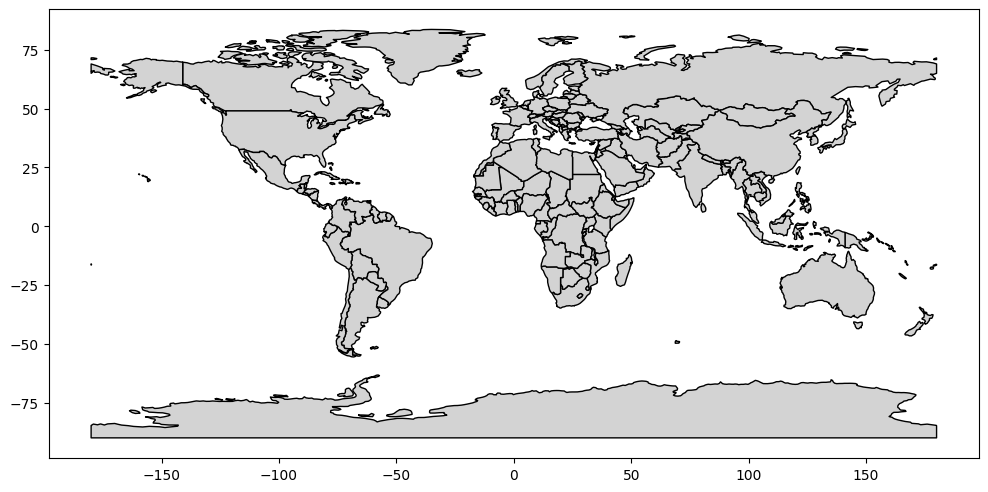

In [166]:
world.plot(figsize=(12, 6), color='lightgrey', edgecolor='black')

<Axes: >

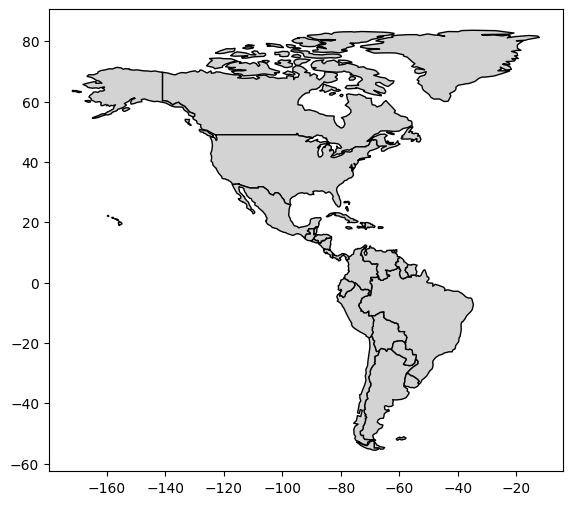

In [167]:
world[world ['REGION_UN'] == 'Americas'].plot(figsize=(12, 6), color='lightgrey', edgecolor='black')

<Axes: >

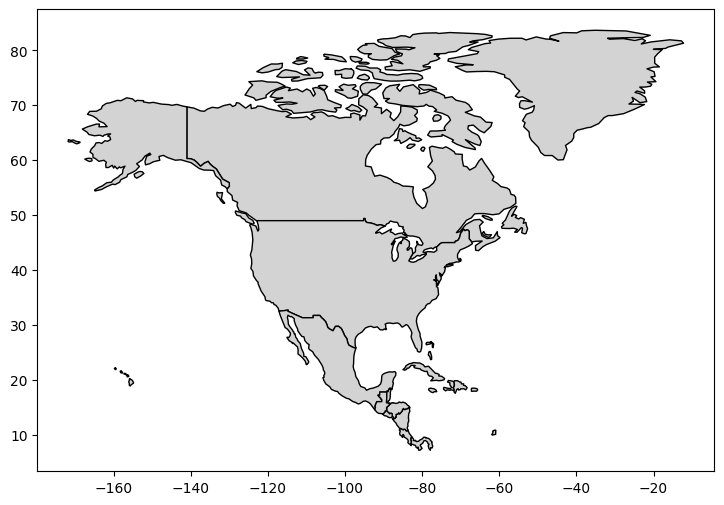

In [168]:
world[world ['CONTINENT'] == 'North America'].plot(figsize=(12, 6), color='lightgrey', edgecolor='black')

<Axes: >

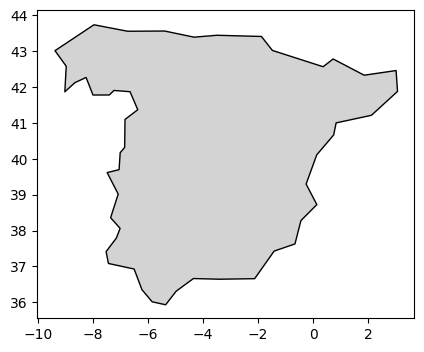

In [169]:
world[world ['NAME'] == 'Spain'].plot(figsize=(12, 4), color='lightgrey', edgecolor='black')

Folium es una biblioteca que permite crear mapas interactivos utilizando la biblioteca JavaScript Leaflet. Es ideal para visualizaciones web.

In [170]:
world.head(2)

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  \
0         0      2  Sovereign country   1                         Fiji   
1         0      2  Sovereign country   1  United Republic of Tanzania   

  ADM0_A3  GEOU_DIF   GEOUNIT GU_A3  SU_DIF   SUBUNIT SU_A3  BRK_DIFF  \
0     FJI         0      Fiji   FJI       0      Fiji   FJI         0   
1     TZA         0  Tanzania   TZA       0  Tanzania   TZA         0   

       NAME NAME_LONG BRK_A3  BRK_NAME BRK_GROUP ABBREV POSTAL  \
0      Fiji      Fiji    FJI      Fiji      None   Fiji     FJ   
1  Tanzania  Tanzania    TZA  Tanzania      None  Tanz.     TZ   

                     FORMAL_EN FORMAL_FR NAME_CIAWF NOTE_ADM0 NOTE_BRK  \
0             Republic of Fiji      None       Fiji      None     None   
1  United Republic of Tanzania      None   Tanzania      None     None   

  NAME_SORT NAME_ALT  MAPCOLOR7  MAPCOLOR8  MAPCOLOR9  MAPCOLOR13     POP_EST  \
0      Fiji     None          5          1          2           2    889953.0   
1  Tanzania     None          3          6          2           2  58005463.0   

   POP_RANK  POP_YEAR  GDP_MD  GDP_YEAR                    ECONOMY  \
0        11      2019    5496      2019       6. Developing region   
1        16      2019   63177      2019  7. Least developed region   

               INCOME_GRP FIPS_10 ISO_A2 ISO_A2_EH ISO_A3 ISO_A3_EH ISO_N3  \
0  4. Lower middle income      FJ     FJ        FJ    FJI       FJI    242   
1           5. Low income      TZ     TZ        TZ    TZA       TZA    834   

  ISO_N3_EH UN_A3 WB_A2 WB_A3    WOE_ID  WOE_ID_EH  \
0       242   242    FJ   FJI  23424813   23424813   
1       834   834    TZ   TZA  23424973   23424973   

                     WOE_NOTE ADM0_ISO ADM0_DIFF ADM0_TLC ADM0_A3_US  \
0  Exact WOE match as country      FJI      None      FJI        FJI   
1  Exact WOE match as country      TZA      None      TZA        TZA   

  ADM0_A3_FR ADM0_A3_RU ADM0_A3_ES ADM0_A3_CN ADM0_A3_TW ADM0_A3_IN  \
0        FJI        FJI        FJI        FJI        FJI        FJI   
1        TZA        TZA        TZA        TZA        TZA        TZA   

  ADM0_A3_NP ADM0_A3_PK ADM0_A3_DE ADM0_A3_GB ADM0_A3_BR ADM0_A3_IL  \
0        FJI        FJI        FJI        FJI        FJI        FJI   
1        TZA        TZA        TZA        TZA        TZA        TZA   

  ADM0_A3_PS ADM0_A3_SA ADM0_A3_EG ADM0_A3_MA ADM0_A3_PT ADM0_A3_AR  \
0        FJI        FJI        FJI        FJI        FJI        FJI   
1        TZA        TZA        TZA        TZA        TZA        TZA   

  ADM0_A3_JP ADM0_A3_KO ADM0_A3_VN ADM0_A3_TR ADM0_A3_ID ADM0_A3_PL  \
0        FJI        FJI        FJI        FJI        FJI        FJI   
1        TZA        TZA        TZA        TZA        TZA        TZA   

  ADM0_A3_GR ADM0_A3_IT ADM0_A3_NL ADM0_A3_SE ADM0_A3_BD ADM0_A3_UA  \
0        FJI        FJI        FJI        FJI        FJI        FJI   
1        TZA        TZA        TZA        TZA        TZA        TZA   

   ADM0_A3_UN  ADM0_A3_WB CONTINENT REGION_UN       SUBREGION  \
0         -99         -99   Oceania   Oceania       Melanesia   
1         -99         -99    Africa    Africa  Eastern Africa   

             REGION_WB  NAME_LEN  LONG_LEN  ABBREV_LEN  TINY  HOMEPART  \
0  East Asia & Pacific         4         4           4   -99         1   
1   Sub-Saharan Africa         8         8           5   -99         1   

   MIN_ZOOM  MIN_LABEL  MAX_LABEL     LABEL_X    LABEL_Y       NE_ID  \
0       0.0        3.0        8.0  177.975427 -17.826099  1159320625   
1       0.0        3.0        8.0   34.959183  -6.051866  1159321337   

  WIKIDATAID  NAME_AR     NAME_BN   NAME_DE   NAME_EN   NAME_ES   NAME_FA  \
0       Q712     فيجي        ফিজি   Fidschi      

In [171]:
mapa = folium.Map([0,0], zoom_start=2)
folium.GeoJson(
    world,
    name = 'NAME'
).add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa.save('mapa.html')

In [172]:
mapa

In [173]:
mapa = folium.Map([0, 0], zoom_start=2)

# Definir los límites de las categorías de población
bins = [0, 50000000, 100000000, 500000000, 1000000000, world['POP_EST'].max()]

# Crear el mapa coroplético
folium.Choropleth(
    geo_data=world,
    data=world,
    columns=['NAME', 'POP_EST'],  # Columna de países y población
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',  # Paleta de colores
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Estimate',
    bins=bins,  # Definir los límites de las categorías
    reset=True
).add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa.save('mapa_poblacion.html')
 

In [174]:
mapa

In [175]:
# Crear un mapa de España
mapa_espana = folium.Map(location=[40.4168, -3.7038], zoom_start=5)
# Filtrar el GeoDataFrame para obtener solo España
spain = world[world['NAME'] == 'Spain']
# Añadir los límites de España al mapa
folium.GeoJson(
    spain,
    name='España',
    popup=None  # Deshabilitar los popups que generan los pins
).add_to(mapa_espana)

mapa_espana

In [176]:
import matplotlib.pyplot as plt
import random

# Crear una lista de colores en tonos pasteles para las ciudades
provincias_geojson['features'] = [
    {
        **feature,
        'properties': {
            **feature['properties'],
            'color': f'#{random.randint(150, 255):02x}{random.randint(150, 255):02x}{random.randint(150, 255):02x}'  # Tonos pasteles
        }
    }
    for feature in provincias_geojson['features']
]

# Crear el mapa centrado en España
mapa = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

# Añadir las ciudades al mapa con colores diferentes
folium.GeoJson(
    provincias_geojson,
    name='Ciudades',
    style_function=lambda feature: {
        'fillColor': feature['properties']['color'],
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['Ciudad:'])
).add_to(mapa)

folium.LayerControl().add_to(mapa)
# Guardar el mapa en un archivo HTML
mapa.save('mapa_espana.html')

# Mostrar el mapa
mapa

In [179]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster, MiniMap, Search, MeasureControl
import pandas as pd
import json
import random

# ======================
# Cargar y preparar datos
# ======================

# Ruta local del archivo .shp
ruta_shp = "/Users/patriciajaquez/Documents/GitHub/mapas_python/mapas/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp"

# Leer shapefile con GeoPandas
provincias_espana = gpd.read_file(ruta_shp)

# Filtrar provincias solo de España
provincias_espana = provincias_espana[provincias_espana['admin'] == 'Spain']

# Asegurar que los datos están en WGS84
if provincias_espana.crs and provincias_espana.crs != "EPSG:4326":
    provincias_espana = provincias_espana.to_crs(epsg=4326)

# ======================
# Funciones de preparación
# ======================

def prepare_geodataframe(gdf):
    df_copy = gdf.copy()
    for col in df_copy.columns:
        if pd.api.types.is_datetime64_any_dtype(df_copy[col]):
            df_copy[col] = df_copy[col].astype(str)
    return df_copy

provincias_preparadas = prepare_geodataframe(provincias_espana)

# Para los centroides, proyectamos temporalmente a EPSG:3857
provincias_temp = provincias_preparadas.to_crs(epsg=3857)
centroides = provincias_temp.geometry.centroid.to_crs(epsg=4326)

# Centro del mapa
centro_lat = centroides.y.mean()
centro_lon = centroides.x.mean()

# ======================
# Crear Mapa
# ======================

mapa = folium.Map(
    location=[centro_lat, centro_lon],
    zoom_start=6,
    tiles='CartoDB Positron'
)

# Paleta de colores pastel
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

def get_color(feature):
    nombre = feature['properties']['name'] if 'name' in feature['properties'] else ''
    indice_color = ord(nombre[0].upper()) % len(colores) if nombre else 0
    return colores[indice_color]

# Convertir a GeoJSON serializable
provincias_json = json.loads(provincias_preparadas.to_json())

# Añadir provincias al mapa
folium.GeoJson(
    provincias_json,
    name='Provincias',
    style_function=lambda feature: {
        'fillColor': get_color(feature),
        'color': 'white',
        'weight': 1.5,
        'fillOpacity': 0.6,
        'dashArray': '3'
    },
    highlight_function=lambda feature: {
        'weight': 3,
        'color': '#666',
        'dashArray': '',
        'fillOpacity': 0.7
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name'],
        aliases=['Provincia'],
        sticky=True,
        localize=True
    )
).add_to(mapa)

# ======================
# Añadir marcadores
# ======================

marker_cluster = MarkerCluster(name='Capitales de Provincia').add_to(mapa)

for idx, centroide in enumerate(centroides):
    if idx < len(provincias_preparadas):
        row = provincias_preparadas.iloc[idx]
        nombre = row['name'] if 'name' in row and not pd.isna(row['name']) else f"Provincia {idx}"
        folium.Marker(
            location=[centroide.y, centroide.x],
            tooltip=nombre,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(marker_cluster)

# ======================
# Añadir herramientas
# ======================

# Minimap
minimap = MiniMap(toggle_display=True)
mapa.add_child(minimap)

# Regla de medida
MeasureControl(position='bottomleft', primary_length_unit='kilometers').add_to(mapa)

# Control de capas
folium.LayerControl().add_to(mapa)

# Título fijo en pantalla
title_html = '''
<div style="position: fixed; 
    top: 10px; right: 50px; width: 250px; height: 75px; 
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px; border-radius: 5px;">
    <b>Mapa de Provincias de España</b><br>
    Explora las diferentes provincias de España
</div>
'''
mapa.get_root().html.add_child(folium.Element(title_html))

# ======================
# Guardar mapa
# ======================

mapa.save('mapa_provincias_espana.html')
print("✅ Mapa guardado como 'mapa_provincias_espana.html'")

mapa

✅ Mapa guardado como 'mapa_provincias_espana.html'
